<a href="https://colab.research.google.com/github/vvrgit/ML-Models-and-Applications/blob/main/MultipleLinearRegression_AITrack_SampleData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

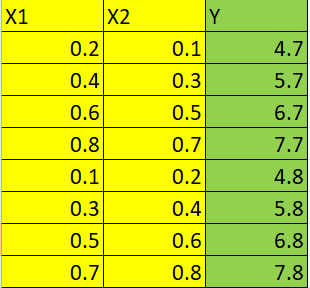

## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import required libraries

In [2]:
import numpy as np
import math as mt
import random
import pandas as pd

## Import Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/sampledata_02.csv')
data.head()

,X1,X2,Y
0,0.2,0.1,4.7
1,0.4,0.3,5.7
2,0.6,0.5,6.7
3,0.8,0.7,7.7
4,0.1,0.2,4.8


## *Outliers Detection*

In [4]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [5]:
sample_outliers_X1 = detect_outliers_zscore(data['X1'])
sample_outliers_X2 = detect_outliers_zscore(data['X2'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in X1 column from Z-scores method: ", sample_outliers_X1)
print("Outliers in X2 column from Z-scores method: ", sample_outliers_X2)
print("Outliers in Y column from Z-scores method: ", sample_outliers_Y)

Outliers in X1 column from Z-scores method:  []
Outliers in X2 column from Z-scores method:  []
Outliers in Y column from Z-scores method:  []


# Outlier Detection and Treatment

In [6]:
from scipy.stats import zscore
z1 = np.abs(zscore(data['X1']))
z2 = np.abs(zscore(data['X2']))
data['ZscoreX1'] = z1
data['ZscoreX2'] = z2
outliers_A=len(data[data['ZscoreX1']>3])
outliers_B=len(data[data['ZscoreX2']>3])
data_z = data[data['ZscoreX1']<3]
data_z = data[data['ZscoreX2']<3]
data=data_z.drop(['ZscoreX1', 'ZscoreX2'], axis=1)
data

,X1,X2,Y
0,0.2,0.1,4.7
1,0.4,0.3,5.7
2,0.6,0.5,6.7
3,0.8,0.7,7.7
4,0.1,0.2,4.8
5,0.3,0.4,5.8
6,0.5,0.6,6.8
7,0.7,0.8,7.8


## Missing Values Treatment

In [7]:
print(data.isnull().sum())

X1    0
X2    0
Y     0
dtype: int64


In [8]:
m1=data['X1'].mean()
m2=data['X2'].mean()
m3=data['Y'].mean()
data['X1'].fillna(value=m1, inplace=True)
data['X2'].fillna(value=m2, inplace=True)
data['Y'].fillna(value=m3, inplace=True)
data

<ipython-input-8-203af371add7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['X1'].fillna(value=m1, inplace=True)
<ipython-input-8-203af371add7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

,X1,X2,Y
0,0.2,0.1,4.7
1,0.4,0.3,5.7
2,0.6,0.5,6.7
3,0.8,0.7,7.7
4,0.1,0.2,4.8
5,0.3,0.4,5.8
6,0.5,0.6,6.8
7,0.7,0.8,7.8


## Data Split

In [9]:
from sklearn.model_selection import train_test_split
dataframe = data.values
X, y = dataframe[:, :-1], dataframe[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
x_train

array([[0.5, 0.6],
       [0.7, 0.8],
       [0.2, 0.1],
       [0.1, 0.2],
       [0.3, 0.4],
       [0.4, 0.3]])

# Initialization

In [10]:
m1=random.uniform(-10,10)
m2=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.1
max_iter=10000

## Gradient Calculation

In [11]:
def gradient(m1,m2,c,x1,x2,y):
  m1_deriv=-1*(y-m1*x1-m2*x2-c)*x1
  m2_deriv=-1*(y-m1*x1-m2*x2-c)*x2
  c_deriv=-1*(y-m1*x1-m2*x2-c)
  return m1_deriv,m2_deriv,c_deriv

## Training Using Stochastic Gradient Descent Optimizer

In [12]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m1,del_m2,del_c=gradient(m1,m2, c, x_train[sample,0],x_train[sample,1], y_train[sample])
    m1=m1-eta*del_m1
    m2=m2-eta*del_m2
    c=c-eta*del_c
print('model parameter m and c',m1,m2,c)

model parameter m and c 2.0000000007059033 2.9999999994206132 3.999999999969463


# Model Prediction on Training Data





In [13]:
y_pred_train = []
for sample in range(x_train.shape[0]):
  x1=x_train[sample,0]
  x2=x_train[sample,1]
  y=y_train[sample]
  y_p_tr = (m1 * x1) + c + (m2 * x2)
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

# Model Prediction on Testing Data





In [14]:
y_pred_test = []
for sample in range(x_test.shape[0]):
  x1=x_test[sample,0]
  x2=x_test[sample,1]
  y=y_test[sample]
  y_p_te = (m1 * x1) + c + (m2 * x2)
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

# Error Metrics Calculation

In [15]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('Root mean square error', rmse)
mse = (mean_squared_error(y_train, y_pred_train))
print('Mean square error', mse)
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 5.44678254870425e-11
Mean square error 2.966744013286917e-21
Mean absolute error 4.705998553807452e-11


In [16]:
#Testing Accuracies
mse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root mean square error', mse)
mse = (mean_squared_error(y_test, y_pred_test))
print('Mean square error', mse)
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 1.1665090759881406e-10
Mean square error 1.3607434243627056e-20
Mean absolute error 1.159627949220976e-10


# Deployment

In [17]:
X1=input('enter X1 value')
X2=input('enter X2 value')
print('X1=',X1)
print('X2=',X2)
Y=m1*float(X1)+m2*float(X2)+c
print('Y=',Y)

enter X1 value0.2
enter X2 value0.1
X1= 0.2
X2= 0.1
Y= 4.700000000052706


# Thank You